# Question 4:

In [159]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df= pd.read_csv('T2D_abundance.csv',sep='\t') #,skiprows=[0], header = None)
#Gist of the dataset
df.head()

,Unnamed: 0,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
1,con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
2,con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
3,con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
4,con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [126]:
#Shape of the data frame
df.shape

(344, 574)

## PCA

In [127]:
y= df["Class"]
y

0      n
1      n
2      n
3      n
4      n
      ..
339    n
340    n
341    n
342    n
343    n
Name: Class, Length: 344, dtype: object

In [130]:
#Removing the non numberic values from the data frame as they cannot be used for PCA
df1= df._get_numeric_data()
#df1= df
df1.shape

(344, 572)

In [32]:
# Fitting the dataset
x_pca= PCA(n_components=2)
x1_pca1= x_pca.fit_transform(df1)

In [33]:
y= df["Class"]
y

0      n
1      n
2      n
3      n
4      n
      ..
339    n
340    n
341    n
342    n
343    n
Name: Class, Length: 344, dtype: object

In [34]:
# PC1 and PC2 
x2_pca = pd.DataFrame(data = x1_pca,columns=["PC1","PC2"])
x2_pca.set_index(df1.index, inplace=True)
x2_pca.head()

,PC1,PC2
0,-2.943049,-2.248075
1,-7.215752,1.835619
2,24.051681,-4.850957
3,-8.684207,6.431783
4,2.565706,-3.969467


In [35]:
y= df["Class"]
y

0      n
1      n
2      n
3      n
4      n
      ..
339    n
340    n
341    n
342    n
343    n
Name: Class, Length: 344, dtype: object

In [36]:
# PCA projections to 2D
pca = pd.concat([x2_pca, y], axis=1)
pca.head()

,PC1,PC2,Class
0,-2.943049,-2.248075,n
1,-7.215752,1.835619,n
2,24.051681,-4.850957,n
3,-8.684207,6.431783,n
4,2.565706,-3.969467,n


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

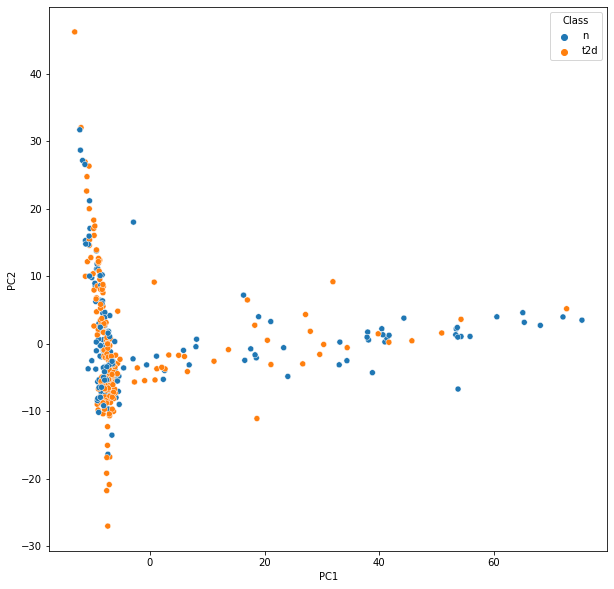

In [29]:
# Visualizing 2D projection
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x = pca['PC1'], y = pca['PC2'],hue = pca['Class'])

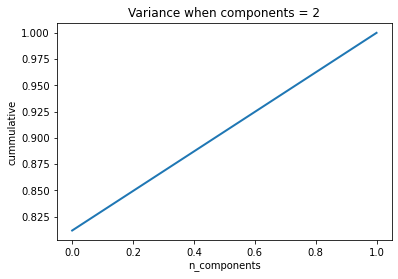

In [56]:
plt.plot(np.cumsum(x_pca.explained_variance_/np.sum(x_pca.explained_variance_)
),linewidth=2)
plt.title('Variance when components = 2')
plt.xlabel('n_components')
plt.ylabel('cummulative')
plt.show()

In [39]:
#explained variance
print(x_pca.explained_variance_ratio_)

[0.29922075 0.06936047]


In [55]:
print(x_pca.explained_variance_)

[331.92461611  76.94134177]


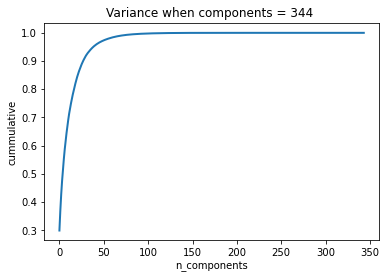

In [62]:
x_pca.n_components= 344
plt.plot(np.cumsum(x_pca.explained_variance_/np.sum(x_pca.explained_variance_)),linewidth=2)
plt.title('Variance when components = 344 ')
plt.xlabel('n_components')
plt.ylabel('cummulative')
plt.show()

In [65]:
print(x_pca.components_)

[[-1.45387205e-03 -1.89665169e-04  4.97933858e-05 ... -3.79143784e-07
  -1.86210369e-07 -5.46973983e-07]
 [-6.42176068e-03 -8.39768721e-04 -3.88205894e-04 ... -1.65254916e-06
  -6.13770431e-07 -9.33181167e-07]
 [ 1.13247306e-03  3.64209361e-04  2.59161428e-05 ...  1.32202426e-06
   6.91208891e-07 -1.21258990e-06]
 ...
 [-2.66744931e-03  9.40763624e-03 -1.18726976e-02 ...  4.87262702e-03
   3.41736713e-03 -2.51149117e-03]
 [ 2.66285826e-05 -9.57333697e-03  1.85697297e-03 ... -9.82471312e-03
  -4.74348714e-03 -4.88389824e-03]
 [-8.09077197e-03 -9.05144208e-04 -4.56536513e-03 ...  5.08789815e-04
   1.32966779e-03 -1.55313621e-03]]


In [66]:
print(x_pca.explained_variance_)

[3.31924616e+02 7.69413444e+01 6.46193472e+01 5.33341404e+01
 4.63412945e+01 4.09333140e+01 3.75588563e+01 3.21123216e+01
 3.10887098e+01 2.83366323e+01 2.54109323e+01 2.36484286e+01
 2.02857442e+01 1.89447548e+01 1.74123483e+01 1.70233997e+01
 1.53734167e+01 1.48155597e+01 1.40718664e+01 1.33507017e+01
 1.24368163e+01 1.14701726e+01 1.03101573e+01 9.39439102e+00
 9.26534984e+00 8.91644524e+00 7.88619930e+00 7.59501626e+00
 6.84246470e+00 6.34681689e+00 6.22408943e+00 5.24339783e+00
 4.82571680e+00 4.40896382e+00 4.31557049e+00 3.89528077e+00
 3.81729106e+00 3.58396570e+00 3.40256569e+00 3.04147874e+00
 2.87152961e+00 2.71562477e+00 2.50167168e+00 2.28516785e+00
 2.19064734e+00 2.06887069e+00 1.87655470e+00 1.75821379e+00
 1.72497195e+00 1.63462169e+00 1.51578455e+00 1.44249288e+00
 1.35039348e+00 1.28098256e+00 1.25814261e+00 1.18702634e+00
 1.09934739e+00 1.07677771e+00 1.06147930e+00 1.02314536e+00
 9.18249955e-01 8.77875795e-01 8.37389509e-01 8.16398087e-01
 7.52889988e-01 7.272644

In [67]:
print(x_pca.explained_variance_ratio_)

[2.99220746e-01 6.93604674e-02 5.82525319e-02 4.80792340e-02
 4.17753792e-02 3.69002362e-02 3.38582571e-02 2.89483586e-02
 2.80256013e-02 2.55446805e-02 2.29072438e-02 2.13183961e-02
 1.82870304e-02 1.70781659e-02 1.56967444e-02 1.53461181e-02
 1.38587046e-02 1.33558122e-02 1.26853935e-02 1.20352837e-02
 1.12114416e-02 1.03400394e-02 9.29431805e-03 8.46878042e-03
 8.35245341e-03 8.03792569e-03 7.10918782e-03 6.84669447e-03
 6.16829031e-03 5.72147769e-03 5.61084232e-03 4.72677631e-03
 4.35024856e-03 3.97455742e-03 3.89036594e-03 3.51148653e-03
 3.44118099e-03 3.23084471e-03 3.06731769e-03 2.74180791e-03
 2.58860353e-03 2.44805968e-03 2.25518696e-03 2.06001482e-03
 1.97480723e-03 1.86502899e-03 1.69166152e-03 1.58498049e-03
 1.55501390e-03 1.47356568e-03 1.36643733e-03 1.30036694e-03
 1.21734190e-03 1.15476991e-03 1.13418033e-03 1.07007100e-03
 9.91030886e-04 9.70684948e-04 9.56893866e-04 9.22336894e-04
 8.27776620e-04 7.91380445e-04 7.54883192e-04 7.35960013e-04
 6.78709241e-04 6.556085

## TSNE

In [138]:
from sklearn.manifold import TSNE

In [155]:
tsne = TSNE(n_components=2).fit_transform(df1)
tsne1 = pd.DataFrame(data = tsne, columns=["sne1","sne2"])

In [156]:
#TSNE projections to 2D
tsne1.set_index(df1.index, inplace=True)
tsne1.head()

,sne1,sne2
0,-3.173052,4.686437
1,-6.180019,-5.785766
2,-14.387036,7.643217
3,1.577909,-4.824881
4,-7.564733,3.460900


In [157]:
tsne3 = pd.concat([tsne1, y], axis=1)
tsne3.head()

,sne1,sne2,Class
0,-3.173052,4.686437,n
1,-6.180019,-5.785766,n
2,-14.387036,7.643217,n
3,1.577909,-4.824881,n
4,-7.564733,3.460900,n


<AxesSubplot:xlabel='sne1', ylabel='sne2'>

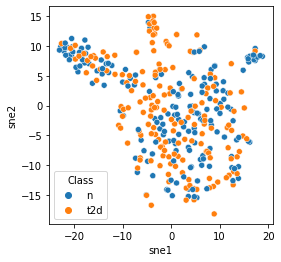

In [158]:
# Visualizing 2D projections:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.scatterplot(x = tsne3['sne1'], y = tsne3['sne2'],hue = tsne3['Class'])

## PCA analyses:
    
    - PCA is a technique for reducing dimensionality. The correlation between characteristics is found using PCA. The associated properties become independent of one another following PCA. The data starts overfitting when there are too many features in the dataset, but PCA helps prevent it by limiting the number of features. 
    
    - From the graph, we can see that the variability is linear for two dimensions.
    
    - We can also see that when variance is high, data points are scattered and clusters are developed for PCA.
    
    - PCA is not an effective strategy for dimensionality reduction, in my opinion. It is clear from the scatter plot that it incorrectly identifies cases of n and t2d. Even though PCA aims to account for as much variance across the dataset's features as possible, it can still leave out some data when compared to the original features.
    
    - t-SNE is a result in a good dimensionality reduction of this dataset. The local and overall structure of the dataset is maintained via t-SNE. In t-SNE, the points that are comparable in high dimensions are also similar in low dimensions. t-SNE is also effective with both linear and non-linear data. It is clear from the scatterplot graph that the data is better visualized with t-SNE.
    

# Question 5:

In [170]:
import matplotlib.pyplot as plt
import math
import numpy as np
import os

In [173]:
dim = []
for i in range(2,51):
    x = np.random.randint(0,500, i)
    y = np.random.randint(0,500, i)
    # Calculating Euclidean Distance
    dist = [np.linalg.norm(j-y) for j in x]
    max_ = max(dist)
    min_ = min(dist)
    delta = math.log10(max_-min_)/max_
    dim.append(delta)

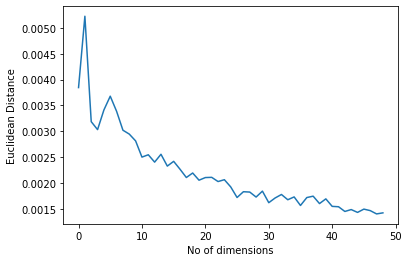

In [174]:
plt.plot(dim)
plt.xlabel('No of dimensions')
plt.ylabel('Euclidean Distance')
plt.show()

## Curse of Dimensionality 

- The curse of dimensionality states that as the size of the dataset rises, the model's performance begins to fall rather than rise. 
- Here we are computing the Euclidean distance between points x and y whose values are random integers generated from 0 to 500. 
- This is carried out for various dimensions from 2 to 50. We can see that while there are fewer dimensions, the distance is greater, and as there are more dimensions, the Euclidean distance begins to decrease. This is really effectively illustrated in the graph. 
- This is the problem with dimensionality: it gets harder and harder to extract key information as the dimension increases.